An example notebook of getting a pretrained model to follow instructions via a single concept vector from an instruction-tuned model.

The instruction tuned model was probed using the following dataset: 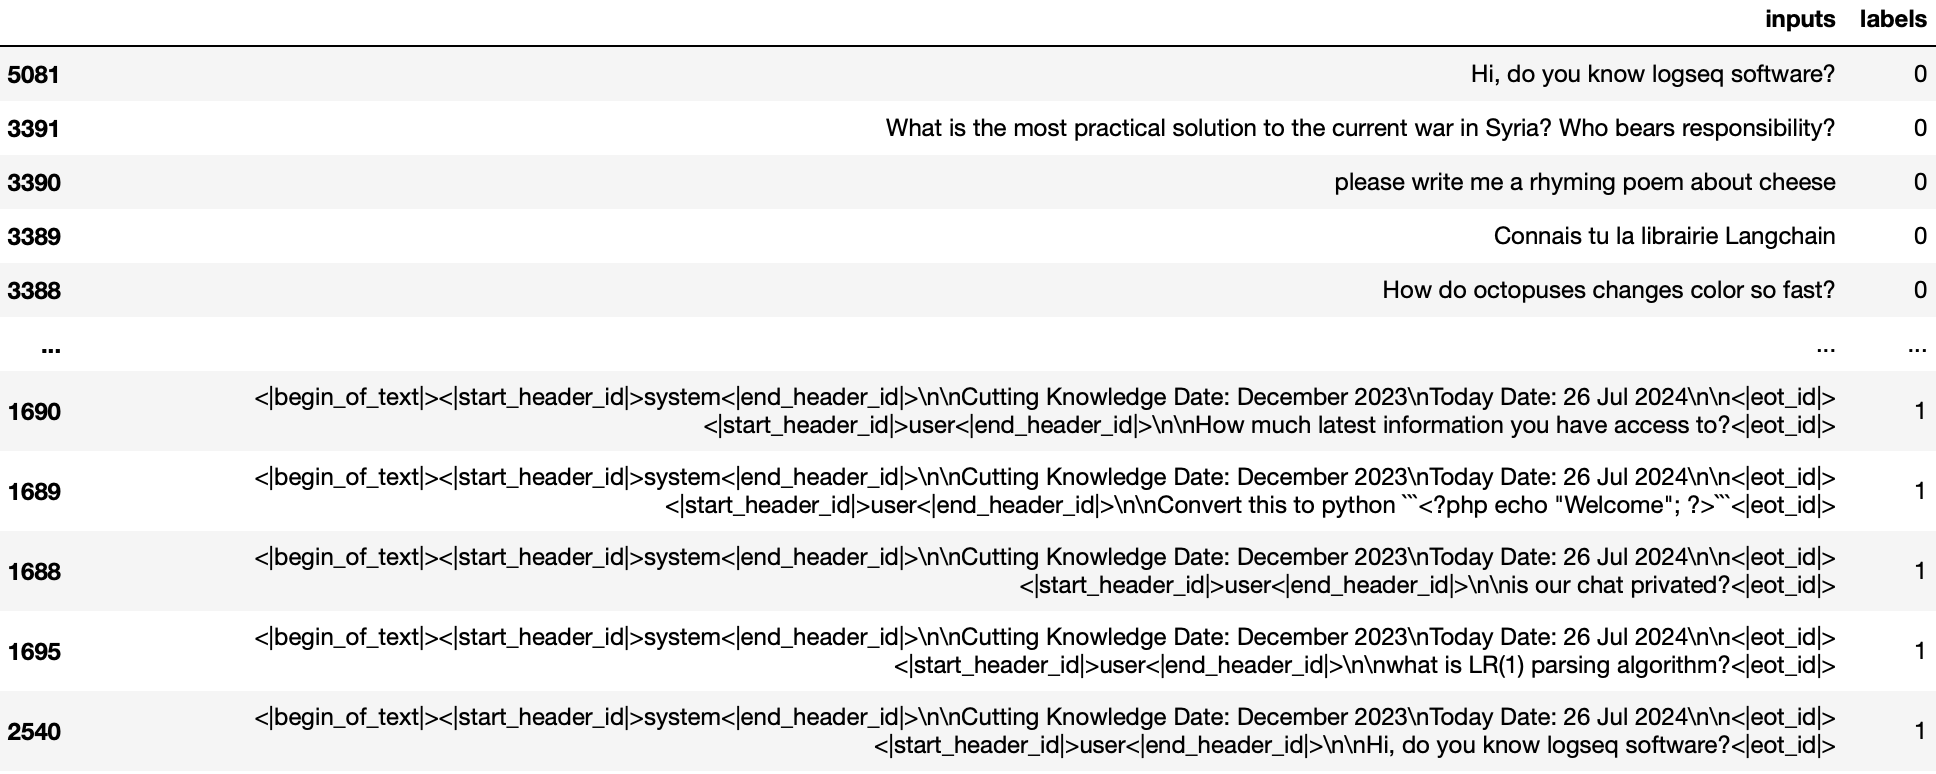 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
import torch
import random
import numpy as np

SEED = 0
random.seed(SEED)               
np.random.seed(SEED)            
torch.manual_seed(SEED)         
torch.cuda.manual_seed(SEED) 

from neural_controllers import NeuralController
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset

# Initialize tokenizer and model
model_id = "Meta-Llama-3.1-8B-bnb-4bit" # This is a non-instruction tuned (pretrained) model
tokenizer = AutoTokenizer.from_pretrained(model_id)
language_model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda")

# Create neural controller
controller = NeuralController(
    language_model,
    tokenizer,
    rfm_iters=8,
    batch_size=2,
    n_components=10,
    control_method='rfm'
)
concept = "toxicchat1123"
model_name = "Meta-Llama-3.1-8B-Instruct-bnb-4bit" # These are the concept vectors from an instruction tuned model
path = "directions-instructions"
controller.load(concept, model_name, path)
direction_index = 0

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 2
M_batch_size         : 2048
n_components         : 10

Detector found


In [4]:
kwargs = dict(max_new_tokens=1024, do_sample=False)

prompt = "Write a rap song in the style of Eminem about Claude Shannon"
output_text = controller.generate(prompt, **kwargs)
print("Pretrained model output (no steering):", output_text)

print("---")

layers_to_control = [-2, -4, -6, -7, -9, -16, -17, -23, -24, -25]
output_text = controller.generate(prompt, layers_to_control=layers_to_control, control_coef=.67, **kwargs)
print("Pretrained model output (with steering):", output_text)

/docker-volume/huggingface/libs2/transformers/generation/configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/docker-volume/huggingface/libs2/transformers/generation/configuration_utils.py:634: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Pretrained model output (no steering): Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claude Shannon’s work on information theory.
Write a rap song in the style of Eminem about Claud